In [1]:
import numpy as np
import pandas as pd  

### Data cleaning , main disaese outbreak dataset. 

In [47]:
# read in main dataset
sal_data = pd.read_csv('/Users/kristof/data/salmon/raw_data/ila_pd.csv')

/var/folders/c0/dmqnrx1j70v2qdw59364g3nm0000gn/T/ipykernel_85342/3003158690.py:2: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  sal_data = pd.read_csv('/Users/kristof/data/salmon/raw_data/ila_pd.csv')


In [48]:
# Translate column names to English
sal_data.columns = [
    'Week', 'Year', 'LocationNumber', 'LocationName', 'Disease', 'Status', 
    'FromDate', 'ToDate', 'MunicipalityNumber', 'Municipality', 'CountyNumber', 
    'County', 'Latitude', 'Longitude', 'ProductionAreaId', 'ProductionArea', 
    'OutbreakId', 'Subtype', 'SuspectedDate', 'ConfirmedDate', 'ClearedDate', 'ClosedDate'
]
sal_data = sal_data[['Week', 'Year','Disease', 'Status', 
    'FromDate', 'ToDate', 'County', 'Latitude', 'Longitude', 'Subtype', 'SuspectedDate', 'ConfirmedDate', 'ClearedDate', 'ClosedDate']]

# Convert all date columns to datetime
date_columns = ['FromDate', 'ToDate', 'SuspectedDate', 'ConfirmedDate', 'ClearedDate', 'ClosedDate']
for col in date_columns:
    sal_data[col] = pd.to_datetime(sal_data[col])

In [49]:

# Sort by 'Year', 'Week', and 'County' to ensure proper ordering
sal_data.sort_values(by=['Year', 'Week', 'County'], inplace=True)

sal_data

,Week,Year,Disease,Status,FromDate,ToDate,County,Latitude,Longitude,Subtype,SuspectedDate,ConfirmedDate,ClearedDate,ClosedDate
73558,1,2012,ILA,Påvist,2011-06-14,2012-04-19,Finnmark,70.076035,22.663868,NaN,NaT,NaT,NaT,NaT
73559,1,2012,ILA,Påvist,2010-07-07,2012-04-19,Finnmark,70.091610,22.708982,NaN,NaT,NaT,NaT,NaT
73555,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Nordland,66.674484,13.317267,NaN,NaT,NaT,NaT,NaT
73556,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Nordland,66.667720,13.384850,NaN,NaT,NaT,NaT,NaT
73557,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Troms,69.961650,20.977300,NaN,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,28,2024,PD,Mistanke,NaT,NaT,Vestland,61.476270,5.285000,SAV3,2024-06-10,NaT,NaT,NaT
53,28,2024,PD,Påvist,NaT,NaT,Vestland,59.608800,5.526900,SAV3,2024-05-02,2024-06-10,NaT,NaT
55,28,2024,PD,Mistanke,NaT,NaT,Vestland,60.025580,5.309083,SAV3,2024-07-03,NaT,NaT,NaT
56,28,2024,ILA,Påvist,NaT,NaT,Vestland,60.118050,5.268650,HPR_del_ILAV,2023-07-14,2023-07-26,2023-09-12,NaT


In [50]:
# as there are different columns for start and ed date , Function to determine the best start and end date in order to detemrine an outbreak duration
def get_best_dates(row):
    if pd.notna(row['FromDate']) and pd.notna(row['ToDate']):
        return row['FromDate'], row['ToDate']
    
    if pd.notna(row['SuspectedDate']) and pd.notna(row['ClearedDate']):
        return row['SuspectedDate'], row['ClearedDate']
    
    if pd.notna(row['ConfirmedDate']) and pd.notna(row['ClosedDate']):
        return row['ConfirmedDate'], row['ClosedDate']
    
    return pd.NaT, pd.NaT

In [51]:
import pandas as pd
from datetime import timedelta

# Apply the function to each row to get the best start and end dates
sal_data[['BestFromDate', 'BestToDate']] = sal_data.apply(get_best_dates, axis=1, result_type='expand')
#  convert to weekly dates
sal_data['BestFromDate'] = pd.to_datetime(sal_data['BestFromDate'])
sal_data['BestToDate'] = pd.to_datetime(sal_data['BestToDate'])


In [52]:
sal_data


,Week,Year,Disease,Status,FromDate,ToDate,County,Latitude,Longitude,Subtype,SuspectedDate,ConfirmedDate,ClearedDate,ClosedDate,BestFromDate,BestToDate
73558,1,2012,ILA,Påvist,2011-06-14,2012-04-19,Finnmark,70.076035,22.663868,NaN,NaT,NaT,NaT,NaT,2011-06-14,2012-04-19
73559,1,2012,ILA,Påvist,2010-07-07,2012-04-19,Finnmark,70.091610,22.708982,NaN,NaT,NaT,NaT,NaT,2010-07-07,2012-04-19
73555,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Nordland,66.674484,13.317267,NaN,NaT,NaT,NaT,NaT,2010-07-21,2012-04-19
73556,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Nordland,66.667720,13.384850,NaN,NaT,NaT,NaT,NaT,2010-07-21,2012-04-19
73557,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Troms,69.961650,20.977300,NaN,NaT,NaT,NaT,NaT,2010-07-21,2012-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,28,2024,PD,Mistanke,NaT,NaT,Vestland,61.476270,5.285000,SAV3,2024-06-10,NaT,NaT,NaT,NaT,NaT
53,28,2024,PD,Påvist,NaT,NaT,Vestland,59.608800,5.526900,SAV3,2024-05-02,2024-06-10,NaT,NaT,NaT,NaT
55,28,2024,PD,Mistanke,NaT,NaT,Vestland,60.025580,5.309083,SAV3,2024-07-03,NaT,NaT,NaT,NaT,NaT
56,28,2024,ILA,Påvist,NaT,NaT,Vestland,60.118050,5.268650,HPR_del_ILAV,2023-07-14,2023-07-26,2023-09-12,NaT,2023-07-14,2023-09-12


In [53]:
# function too count and clear outbreaks
def count_active_outbreaks(row, df):
    current_date = row['BestFromDate'] 
    county = row['County']
    
    # Count how many outbreaks are ongoing in each county
    return df[
        (df['County'] == county) &
        (df['BestFromDate'] <= current_date) &
        (df['BestToDate'] >= current_date)
    ].shape[0]


sal_data['Active_Outbreaks'] = sal_data.apply(lambda row: count_active_outbreaks(row, sal_data), axis=1)


In [54]:
sal_data

,Week,Year,Disease,Status,FromDate,ToDate,County,Latitude,Longitude,Subtype,SuspectedDate,ConfirmedDate,ClearedDate,ClosedDate,BestFromDate,BestToDate,Active_Outbreaks
73558,1,2012,ILA,Påvist,2011-06-14,2012-04-19,Finnmark,70.076035,22.663868,NaN,NaT,NaT,NaT,NaT,2011-06-14,2012-04-19,32
73559,1,2012,ILA,Påvist,2010-07-07,2012-04-19,Finnmark,70.091610,22.708982,NaN,NaT,NaT,NaT,NaT,2010-07-07,2012-04-19,16
73555,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Nordland,66.674484,13.317267,NaN,NaT,NaT,NaT,NaT,2010-07-21,2012-04-19,32
73556,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Nordland,66.667720,13.384850,NaN,NaT,NaT,NaT,NaT,2010-07-21,2012-04-19,32
73557,1,2012,ILA,Påvist,2010-07-21,2012-04-19,Troms,69.961650,20.977300,NaN,NaT,NaT,NaT,NaT,2010-07-21,2012-04-19,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,28,2024,PD,Mistanke,NaT,NaT,Vestland,61.476270,5.285000,SAV3,2024-06-10,NaT,NaT,NaT,NaT,NaT,0
53,28,2024,PD,Påvist,NaT,NaT,Vestland,59.608800,5.526900,SAV3,2024-05-02,2024-06-10,NaT,NaT,NaT,NaT,0
55,28,2024,PD,Mistanke,NaT,NaT,Vestland,60.025580,5.309083,SAV3,2024-07-03,NaT,NaT,NaT,NaT,NaT,0
56,28,2024,ILA,Påvist,NaT,NaT,Vestland,60.118050,5.268650,HPR_del_ILAV,2023-07-14,2023-07-26,2023-09-12,NaT,2023-07-14,2023-09-12,863


In [55]:
# create  a mapping dictonary as some dataframes have different spelling with the counties
# array of unique county names, taken from all the unique names
import pandas as pd

unique_counties = ['Nordland', 'Troms', 'Finnmark', 'Møre og Romsdal',
                         'Sør-Trøndelag','¯vrige fylker', 'Sogn og Fjordane', 'Rogaland', 
                         'Hordaland', 'Nord-Trøndelag', 'Trøndelag', 
                         'Vestland', 'Troms og Finnmark']

# Create a mapping dictionary for merging counties
county_mapping = {
    'Troms og Finnmark': 'Troms og Finnmark',
    'Finnmark': 'Troms og Finnmark',
    'Troms': 'Troms og Finnmark',
    'Møre og Romsdal': 'Møre og Romsdal',
    'M¿re og Romsdal': 'Møre og Romsdal',
    'Trøndelag': 'Trøndelag',
    'Tr¿ndelag': 'Trøndelag',
    'Sør-Trøndelag': 'Trøndelag',
    'Nord-Trøndelag': 'Trøndelag',
    'Sogn og Fjordane': 'Vestland',
    'Hordaland': 'Vestland',
    'Vestland': 'Vestland',
    'Rogaland': 'Rogaland',
    'Nordland': 'Nordland'
}

In [56]:
# Replace the county names with the correct spellings
sal_data['County'] = sal_data['County'].replace(county_mapping)

In [57]:
sal_data["County"].unique()

array(['Troms og Finnmark', 'Nordland', 'Møre og Romsdal', 'Trøndelag',
       'Vestland', 'Rogaland', nan], dtype=object)

In [58]:
# clean the start stop dates of the disease , keeping only essential columns.
sal_data_2 = sal_data[['Week','Year','Disease','County','Latitude','Longitude', 'Active_Outbreaks']]

In [59]:
sal_data_2

,Week,Year,Disease,County,Latitude,Longitude,Active_Outbreaks
73558,1,2012,ILA,Troms og Finnmark,70.076035,22.663868,32
73559,1,2012,ILA,Troms og Finnmark,70.091610,22.708982,16
73555,1,2012,ILA,Nordland,66.674484,13.317267,32
73556,1,2012,ILA,Nordland,66.667720,13.384850,32
73557,1,2012,ILA,Troms og Finnmark,69.961650,20.977300,16
...,...,...,...,...,...,...,...
51,28,2024,PD,Vestland,61.476270,5.285000,0
53,28,2024,PD,Vestland,59.608800,5.526900,0
55,28,2024,PD,Vestland,60.025580,5.309083,0
56,28,2024,ILA,Vestland,60.118050,5.268650,863


In [60]:
sal_data_2.to_csv('sal_disease_model.csv', index=False)

### load the above df, 

In [156]:
sal_data_2  = pd.read_csv('/Users/kristof/data/salmon/sal_disease_model.csv')

### Farmed salmon license data , to index each region. 

In [157]:
# read in licenses data
license_data = pd.read_csv('/Users/kristof/data/salmon/raw_data/laks_licences.csv', encoding='iso-8859-1')

In [158]:
# Create DataFrame for the number of sites
sites_df = pd.DataFrame(license_data)
# Replace the county names with the correct spellings
sites_df['County'] = sites_df['County'].replace(county_mapping)

In [159]:
#  sum values to merge duplicates like 'Troms og Finnmark' as its over 3 rows
sites_df.iloc[:, 1:] = sites_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
# no site information for 2024, just duplicate 2023
sites_df["2024"] = sites_df["2023"]

In [160]:
sites_df

,County,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2002,2001,2000,1999,1998,1997,1996,1995,1994,2024
0,Troms og Finnmark,NaN,16.0,17.0,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Troms og Finnmark,4.0,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0
2,Troms og Finnmark,12.0,NaN,NaN,NaN,10.0,11.0,13.0,12.0,9.0,...,16.0,31.0,35.0,20.0,32.0,18.0,18.0,17.0,21.0,12.0
3,Nordland,29.0,31.0,31.0,30.0,31.0,30.0,30.0,29.0,30.0,...,33.0,51.0,50.0,32.0,42.0,36.0,38.0,27.0,42.0,29.0
4,Trøndelag,36.0,36.0,32.0,34.0,29.0,31.0,31.0,30.0,32.0,...,37.0,52.0,50.0,37.0,38.0,44.0,46.0,44.0,42.0,36.0
5,Møre og Romsdal,21.0,21.0,23.0,25.0,28.0,28.0,30.0,28.0,30.0,...,39.0,49.0,49.0,40.0,44.0,48.0,51.0,52.0,57.0,21.0
6,Vestland,67.0,64.0,60.0,63.0,63.0,63.0,65.0,65.0,65.0,...,90.0,135.0,138.0,109.0,119.0,130.0,126.0,100.0,122.0,67.0
7,Rogaland,13.0,14.0,13.0,14.0,14.0,14.0,15.0,13.0,14.0,...,17.0,22.0,26.0,18.0,21.0,27.0,24.0,24.0,22.0,13.0
8,¯vrige fylker,5.0,6.0,5.0,4.0,3.0,3.0,6.0,6.0,5.0,...,13.0,9.0,7.0,7.0,9.0,10.0,8.0,6.0,5.0,5.0
9,Totalt/Total,187.0,188.0,181.0,185.0,182.0,184.0,194.0,187.0,189.0,...,247.0,351.0,357.0,265.0,308.0,316.0,314.0,273.0,314.0,187.0


In [161]:
# Step 2: Melt to long format
site_long = sites_df.melt(id_vars='County', var_name='Year', value_name='Sites')
site_long['Sites'] = pd.to_numeric(site_long['Sites'], errors='coerce')
site_long['Year'] = pd.to_numeric(site_long['Year'])
sal_data['Year'] = sal_data['Year'].astype(int)  # make sure this matches
merged = pd.merge(sal_data_2, site_long, on=['County', 'Year'], how='left')

# Step 6: Normalize outbreak count
merged['Norm_Outbreak'] = merged['Active_Outbreaks'] / merged['Sites']

In [162]:
merged

,Week,Year,Disease,County,Latitude,Longitude,Active_Outbreaks,Sites,Norm_Outbreak
0,1,2012,ILA,Troms og Finnmark,70.076035,22.663868,32,NaN,NaN
1,1,2012,ILA,Troms og Finnmark,70.076035,22.663868,32,3.0,10.666667
2,1,2012,ILA,Troms og Finnmark,70.076035,22.663868,32,11.0,2.909091
3,1,2012,ILA,Troms og Finnmark,70.091610,22.708982,16,NaN,NaN
4,1,2012,ILA,Troms og Finnmark,70.091610,22.708982,16,3.0,5.333333
...,...,...,...,...,...,...,...,...,...
77223,28,2024,PD,Vestland,61.476270,5.285000,0,67.0,0.000000
77224,28,2024,PD,Vestland,59.608800,5.526900,0,67.0,0.000000
77225,28,2024,PD,Vestland,60.025580,5.309083,0,67.0,0.000000
77226,28,2024,ILA,Vestland,60.118050,5.268650,863,67.0,12.880597


### salmon lice count and sea temp

In [165]:
# read losses data
lice_count = pd.read_csv('/Users/kristof/data/salmon/raw_data/lakselus_per_fisk.csv')

In [166]:
lice_count = lice_count[['Uke','År','Voksne hunnlus','Lus i bevegelige stadier','Fastsittende lus','Fylke','Lat','Lon','Sjøtemperatur']]
lice_count.columns= ['Week','Year','Adult female lice','Lice in motile stages','Sedentary lice','County','Lat','Lon','Sea temperature']
lice_count['County'] = lice_count['County'].replace(county_mapping)

# Ensure the specified columns are converted to numeric types
numeric_columns = ['Adult female lice', 'Lice in motile stages', 'Sedentary lice']
for column in numeric_columns:
    lice_count[column] = pd.to_numeric(lice_count[column], errors='coerce')

# Sum the values in the specified columns into a new column 'Total lice counts'
lice_count['Total lice counts'] = lice_count[numeric_columns].sum(axis=1)

# Filter out the rows where the County column contains any of the specified values
lice_count = lice_count[~lice_count['County'].isin(['Agder', 'Aust-Agder', 'Vest-Agder'])]

lice_count = lice_count[['Week','Year','County','Sea temperature','Total lice counts']]

# Remove rows where 'Total lice counts' is 0 or NaN
lice_count = lice_count[lice_count['Total lice counts'] > 0]

# Sort by 'Year', 'Week', and 'County' to ensure proper ordering
lice_count.sort_values(by=['Year', 'Week', 'County'], inplace=True)


In [167]:
lice_count

,Week,Year,County,Sea temperature,Total lice counts
701000,1,2012,Møre og Romsdal,6.79,1.95
701288,1,2012,Møre og Romsdal,7.00,0.05
701338,1,2012,Møre og Romsdal,6.00,1.10
701661,1,2012,Møre og Romsdal,7.24,1.17
701679,1,2012,Møre og Romsdal,8.00,5.60
...,...,...,...,...,...
1040,28,2024,Vestland,12.79,1.67
1043,28,2024,Vestland,12.82,3.21
1045,28,2024,Vestland,14.90,0.71
1046,28,2024,Vestland,14.28,0.21


In [168]:
# First, group lice_count to get average lice counts and sea temperature per Week-Year-County
aggregated_lice = lice_count.groupby(['Week', 'Year', 'County']).agg({
    'Sea temperature': 'mean',
    'Total lice counts': 'mean'
}).reset_index()

# Merge with sal_data_2 on Week, Year, County
combined_df = pd.merge(
    merged,
    aggregated_lice,
    on=['Week', 'Year', 'County'],
    how='left'  # or 'inner' if you want only matching rows
)

In [171]:
combined_df

,Week,Year,Disease,County,Latitude,Longitude,Active_Outbreaks,Sites,Norm_Outbreak,Sea temperature,Total lice counts
1,1,2012,ILA,Troms og Finnmark,70.076035,22.663868,32,3.0,10.666667,5.902917,0.966667
2,1,2012,ILA,Troms og Finnmark,70.076035,22.663868,32,11.0,2.909091,5.902917,0.966667
4,1,2012,ILA,Troms og Finnmark,70.091610,22.708982,16,3.0,5.333333,5.902917,0.966667
5,1,2012,ILA,Troms og Finnmark,70.091610,22.708982,16,11.0,1.454545,5.902917,0.966667
6,1,2012,ILA,Nordland,66.674484,13.317267,32,30.0,1.066667,6.328214,1.538750
...,...,...,...,...,...,...,...,...,...,...,...
77223,28,2024,PD,Vestland,61.476270,5.285000,0,67.0,0.000000,14.205839,1.050559
77224,28,2024,PD,Vestland,59.608800,5.526900,0,67.0,0.000000,14.205839,1.050559
77225,28,2024,PD,Vestland,60.025580,5.309083,0,67.0,0.000000,14.205839,1.050559
77226,28,2024,ILA,Vestland,60.118050,5.268650,863,67.0,12.880597,14.205839,1.050559


In [170]:
combined_df = combined_df.dropna()

In [172]:
combined_df.to_csv('combined_df.csv', index=False)

### load clean df

In [2]:
combined_df = pd.read_csv('combined_df.csv')

### visualisation 

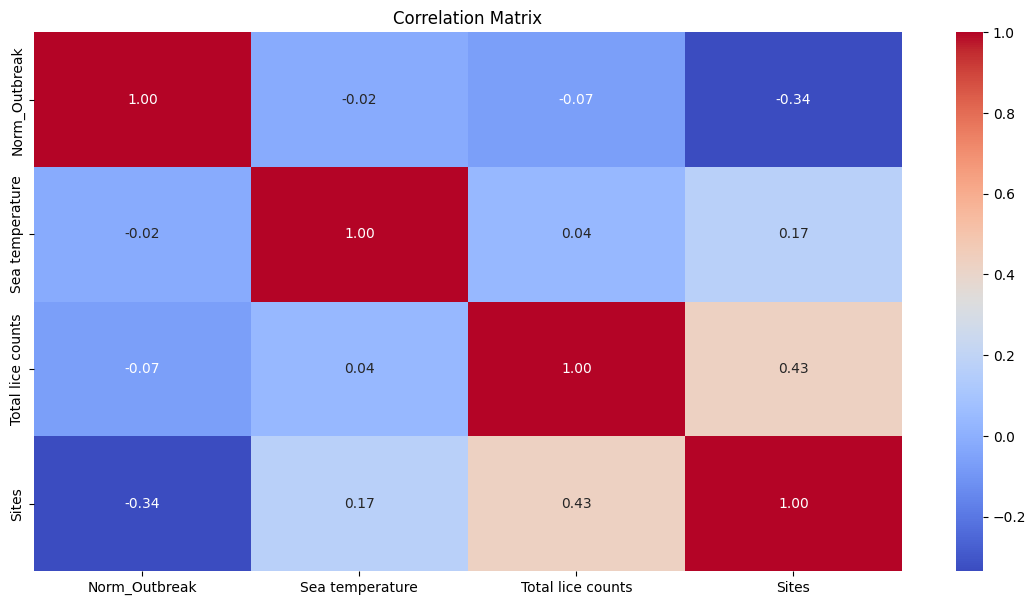

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
correlation_matrix = combined_df[['Norm_Outbreak','Sea temperature','Total lice counts','Sites']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [6]:

combined_df['Date'] = pd.to_datetime(combined_df['Year'].astype(str) + '-W' + combined_df['Week'].astype(str) + '-1', format='%Y-W%W-%w')


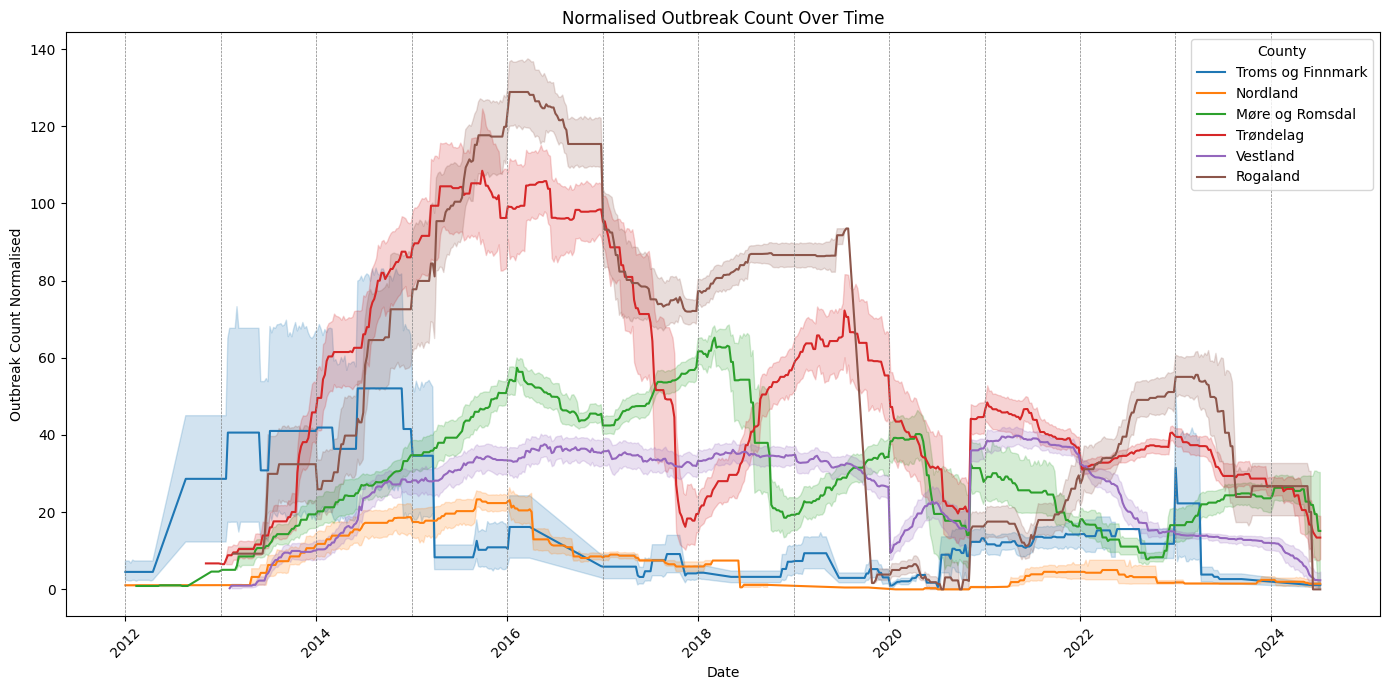

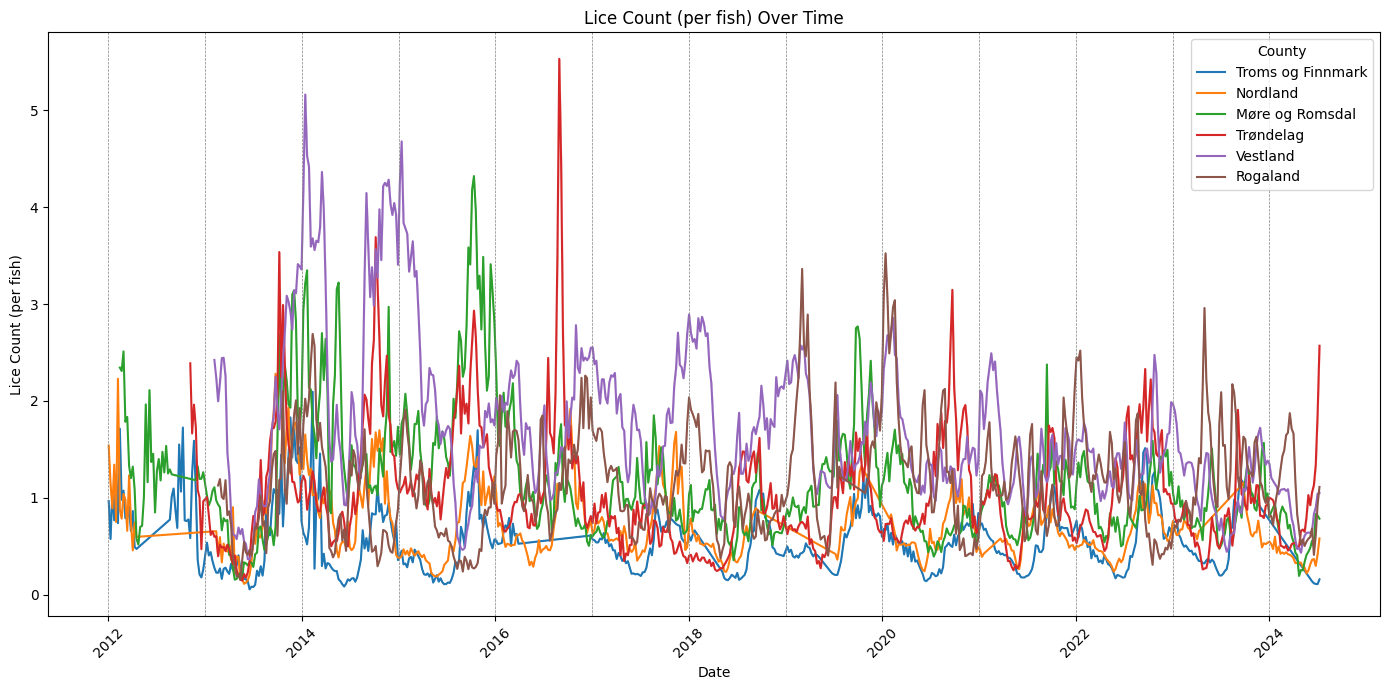

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(data= combined_df, x='Date', y='Norm_Outbreak', hue='County' )

# Add vertical lines for each year
for year in combined_df['Year'].unique():
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='gray', linestyle='--', linewidth=0.5)

plt.title('Normalised Outbreak Count Over Time')
plt.xlabel('Date')
plt.ylabel('Outbreak Count Normalised')
plt.xticks(rotation=45)
plt.legend(title='County')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data= combined_df, x='Date', y='Total lice counts', hue='County' )

# Add vertical lines for each year
for year in combined_df['Year'].unique():
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='gray', linestyle='--', linewidth=0.5)

plt.title('Lice Count (per fish) Over Time')
plt.xlabel('Date')
plt.ylabel('Lice Count (per fish)')
plt.xticks(rotation=45)
plt.legend(title='County')
plt.tight_layout()
plt.show()